# Business Understanding:
Decoding Science: Classifying Abstracts with NLP
~14,000 scientific abstracts

Each abstract is labeled with multiple research domains

Text is formal, technical, and information-dense

Task: Multi-label classification of abstracts

# Data Understanding








In [2]:
import pandas as pd
train_path = "/content/Train.csv"
train_df = pd.read_csv(train_path)

print("Train Data:")
display(train_df.head())

Train Data:


,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Dataset info
print("\nData Info:")
print(train_df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14004 entries, 0 to 14003
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   id                                            14004 non-null  int64 
 1   ABSTRACT                                      14004 non-null  object
 2   Computer Science                              14004 non-null  int64 
 3   Mathematics                                   14004 non-null  int64 
 4   Physics                                       14004 non-null  int64 
 5   Statistics                                    14004 non-null  int64 
 6   Analysis of PDEs                              14004 non-null  int64 
 7   Applications                                  14004 non-null  int64 
 8   Artificial Intelligence                       14004 non-null  int64 
 9   Astrophysics of Galaxies                      14004 non-null

In [4]:
# Shape (rows, columns)
print("\nShape:", train_df.shape)

# Size (total number of cells)
print("\nSize:", train_df.size)

# List of column names
print("\nColumn Names:", train_df.columns.tolist())


Shape: (14004, 31)

Size: 434124

Column Names: ['id', 'ABSTRACT', 'Computer Science', 'Mathematics', 'Physics', 'Statistics', 'Analysis of PDEs', 'Applications', 'Artificial Intelligence', 'Astrophysics of Galaxies', 'Computation and Language', 'Computer Vision and Pattern Recognition', 'Cosmology and Nongalactic Astrophysics', 'Data Structures and Algorithms', 'Differential Geometry', 'Earth and Planetary Astrophysics', 'Fluid Dynamics', 'Information Theory', 'Instrumentation and Methods for Astrophysics', 'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory', 'Optimization and Control', 'Representation Theory', 'Robotics', 'Social and Information Networks', 'Statistics Theory', 'Strongly Correlated Electrons', 'Superconductivity', 'Systems and Control']


In [5]:
# Data types
print("\nData Types:")
print(train_df.dtypes)
# Unique values per column
print("\nUnique Values Per Column:")
print(train_df.nunique())


Data Types:
id                                               int64
ABSTRACT                                        object
Computer Science                                 int64
Mathematics                                      int64
Physics                                          int64
Statistics                                       int64
Analysis of PDEs                                 int64
Applications                                     int64
Artificial Intelligence                          int64
Astrophysics of Galaxies                         int64
Computation and Language                         int64
Computer Vision and Pattern Recognition          int64
Cosmology and Nongalactic Astrophysics           int64
Data Structures and Algorithms                   int64
Differential Geometry                            int64
Earth and Planetary Astrophysics                 int64
Fluid Dynamics                                   int64
Information Theory                               int

# Preprocess the Text Data

In this step, the abstracts were cleaned through a series of text processing techniques including lowercasing, removal of numbers and punctuation, tokenization, stopword removal, and lemmatization. This resulted in a new cleaned_abstract column ready for modeling. Exploratory analysis was also conducted using distribution plots and word clouds to better understand the text data.

In [6]:
!pip install nltk --quiet

import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Exploratory Data Analysis (EDA)

Null values:
 id                                              0
ABSTRACT                                        0
Computer Science                                0
Mathematics                                     0
Physics                                         0
Statistics                                      0
Analysis of PDEs                                0
Applications                                    0
Artificial Intelligence                         0
Astrophysics of Galaxies                        0
Computation and Language                        0
Computer Vision and Pattern Recognition         0
Cosmology and Nongalactic Astrophysics          0
Data Structures and Algorithms                  0
Differential Geometry                           0
Earth and Planetary Astrophysics                0
Fluid Dynamics                                  0
Information Theory                              0
Instrumentation and Methods for Astrophysics    0
Machine Learning                    

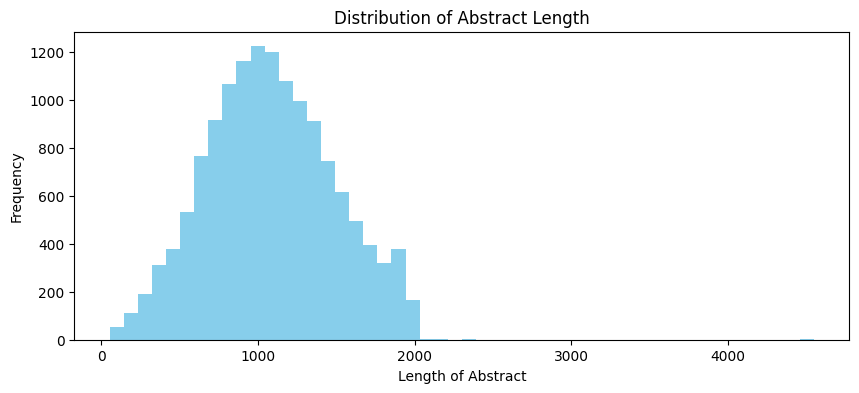

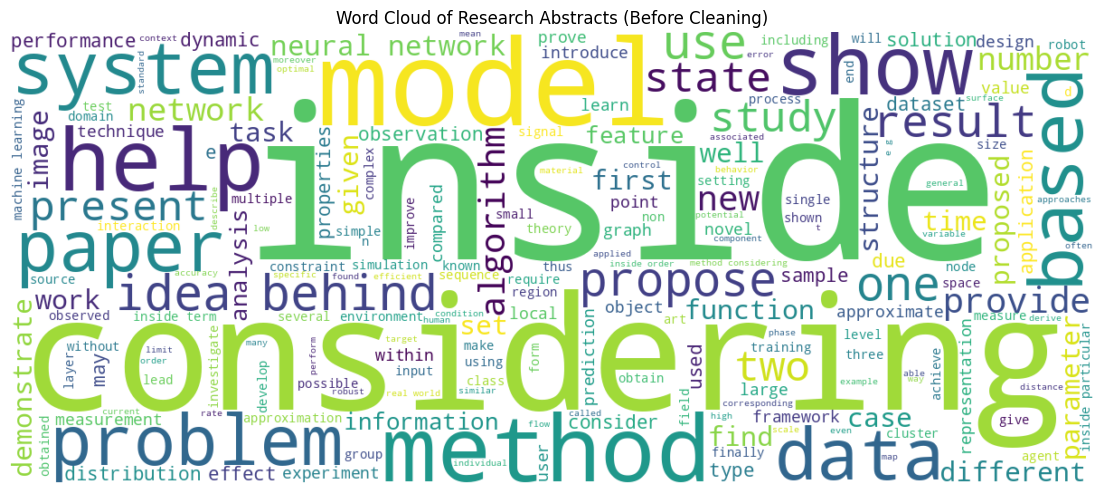

In [7]:
# Check null values
print("Null values:\n", train_df.isnull().sum())

# Length of each abstract
train_df['text_length'] = train_df['ABSTRACT'].astype(str).apply(len)

# Plot abstract length distribution
plt.figure(figsize=(10, 4))
plt.hist(train_df['text_length'], bins=50, color='skyblue')
plt.title('Distribution of Abstract Length')
plt.xlabel('Length of Abstract')
plt.ylabel('Frequency')
plt.show()

# Word cloud (Before cleaning)
text = " ".join(train_df['ABSTRACT'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=1200, height=500, background_color='white').generate(text)

plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Research Abstracts (Before Cleaning)")
plt.show()

Preprocess the Text (Cleaning)
Scientific context	Numbers often carry important information like accuracy, model versions, physical constants, etc.
Semantic meaning	Terms like “2D CNN” or “BERT-Base-12” lose meaning if numbers are removed.
Classification relevance	Numbers may contribute to distinguishing subject areas, e.g., Physics vs AI.
Minimal noise	Unlike tweets or social media, your dataset is formal and technical, so numbers are not random or spammy.


In [8]:
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))  # Define stop_words here
lemmatizer = WordNetLemmatizer()  # Define lemmatizer here

def clean_text(text):
    text = text.lower()  # lowercase
    #text = re.sub(r"\d+", "", text)  # remove numbers
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
    words = word_tokenize(text)  # tokenize
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]  # remove stopwords + lemmatize
    return " ".join(words)

# Apply cleaning
train_df['cleaned_abstract'] = train_df['ABSTRACT'].astype(str).apply(clean_text)

# Display sample
train_df[['ABSTRACT', 'cleaned_abstract']].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,ABSTRACT,cleaned_abstract
0,a ever-growing datasets inside observational a...,evergrowing datasets inside observational astr...
1,we propose the framework considering optimal $...,propose framework considering optimal tmatchin...
2,nanostructures with open shell transition meta...,nanostructures open shell transition metal mol...
3,stars are self-gravitating fluids inside which...,star selfgravitating fluid inside pressure buo...
4,deep neural perception and control networks ar...,deep neural perception control network likely ...


Word Cloud (After Cleaning)

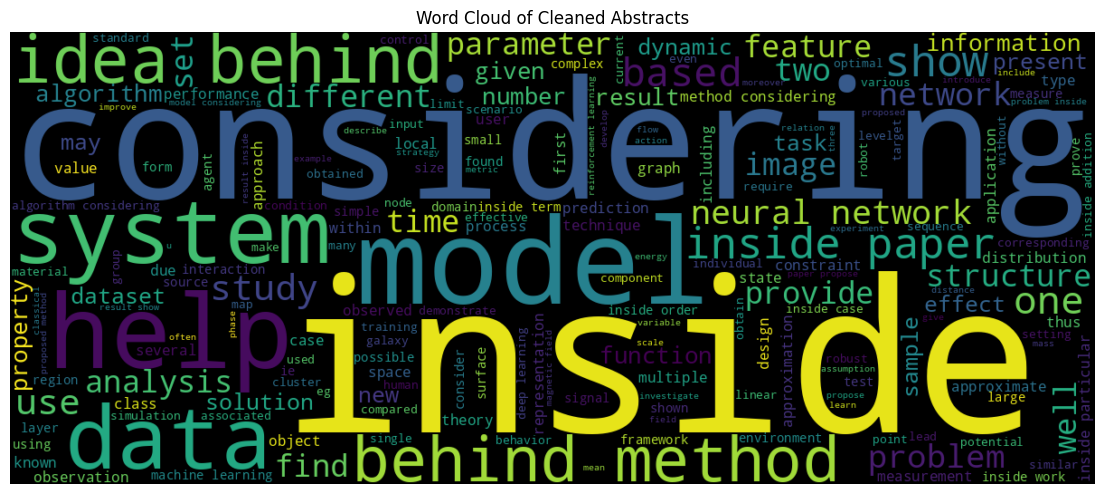

In [9]:
clean_text_all = " ".join(train_df['cleaned_abstract'].dropna().tolist())

wordcloud_clean = WordCloud(width=1200, height=500, background_color='black').generate(clean_text_all)

plt.figure(figsize=(14, 6))
plt.imshow(wordcloud_clean, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Cleaned Abstracts")
plt.show()

# Modeling & Evaluation:





why SciBERT?
Technical abstracts benefit immensely from context

BERT captures the nuances in scientific terminology

Better at generalizing rare or domain-specific terms

Improves macro F1, which matters in multi-label evaluation

In [10]:

import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm

# Load dataset
df = pd.read_csv("Train.csv")
X = df['ABSTRACT']
y = df.iloc[:, 2:]

# Sample subset for speed
X_sample = X.sample(1000, random_state=42)
y_sample = y.loc[X_sample.index].reset_index(drop=True)

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased").eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

# Extract BERT [CLS] embeddings
def get_bert_embeddings(texts, tokenizer, model, device, max_len=128):
    embeddings = []
    with torch.no_grad():
        for text in tqdm(texts, desc="Extracting BERT embeddings"):
            encoded = tokenizer(text, padding='max_length', truncation=True, max_length=max_len, return_tensors='pt')
            input_ids = encoded['input_ids'].to(device)
            attention_mask = encoded['attention_mask'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            cls = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
            embeddings.append(cls)
    return np.array(embeddings)

X_bert = get_bert_embeddings(X_sample.tolist(), tokenizer, bert_model, device)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bert, y_sample, test_size=0.2, random_state=42)

# Build neural network
model = Sequential([
    Input(shape=(768,)),
    Dense(512, activation='relu'),
    Dense(y_train.shape[1], activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer=Adam(1e-4), metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Predict and evaluate
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

f1_micro = f1_score(y_test, y_pred_binary, average='micro')
f1_macro = f1_score(y_test, y_pred_binary, average='macro')

print(f"Micro F1-score: {f1_micro:.4f}")
print(f"Macro F1-score: {f1_macro:.4f}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Extracting BERT embeddings: 100%|██████████| 1000/1000 [00:12<00:00, 80.29it/s]


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.0379 - loss: 0.5846 - val_accuracy: 0.3875 - val_loss: 0.3143
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4639 - loss: 0.2904 - val_accuracy: 0.5875 - val_loss: 0.2400
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6674 - loss: 0.2373 - val_accuracy: 0.7125 - val_loss: 0.2246
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7845 - loss: 0.2207 - val_accuracy: 0.7375 - val_loss: 0.2127
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7902 - loss: 0.2086 - val_accuracy: 0.7500 - val_loss: 0.2026
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7776 - loss: 0.2038 - val_accuracy: 0.7625 - val_loss: 0.1941
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7843 - loss: 0.1959 - val_accuracy: 0.7750 - val_loss: 0.1866
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7955 - loss: 0.1834 - val_accuracy: 0.7750 - val_los

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 856.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/228k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

Extracting SciBERT embeddings:   6%|▌         | 61/1000 [00:00<00:11, 79.12it/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

Extracting SciBERT embeddings: 100%|██████████| 1000/1000 [00:11<00:00, 87.69it/s]


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.0057 - loss: 0.6006 - val_accuracy: 0.2500 - val_loss: 0.3212
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1934 - loss: 0.3283 - val_accuracy: 0.5750 - val_loss: 0.2403
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4062 - loss: 0.2704 - val_accuracy: 0.7625 - val_loss: 0.2211
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5278 - loss: 0.2458 - val_accuracy: 0.8000 - val_loss: 0.2067
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5855 - loss: 0.2414 - val_accuracy: 0.7875 - val_loss: 0.1947
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6355 - loss: 0.2210 - val_accuracy: 0.7875 - val_loss: 0.1834
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6999 - loss: 0.2120 - val_accuracy: 0.7875 - val_loss: 0.1737
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6891 - loss: 0.2024 - val_accuracy: 0.8000 - val_los

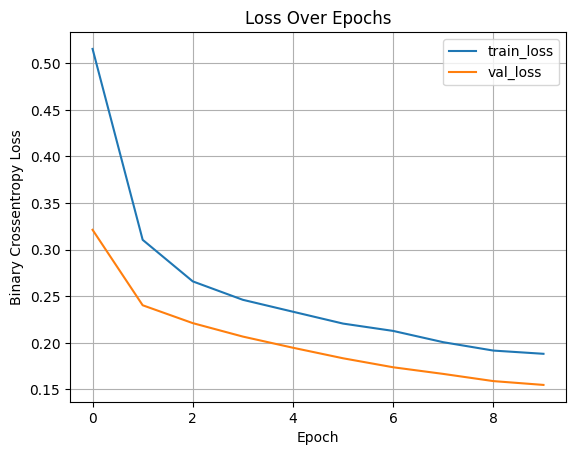

In [11]:
!pip install transformers torch scikit-learn tensorflow matplotlib
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Train.csv")
X = df['ABSTRACT']
y = df.iloc[:, 2:]

# Sample subset for speed
X_sample = X.sample(1000, random_state=42)
y_sample = y.loc[X_sample.index].reset_index(drop=True)

# Load SciBERT model
tokenizer = AutoTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
scibert_model = AutoModel.from_pretrained("allenai/scibert_scivocab_uncased").eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scibert_model.to(device)

# Extract embeddings
def get_scibert_embeddings(texts, tokenizer, model, device, max_len=128):
    embeddings = []
    with torch.no_grad():
        for text in tqdm(texts, desc="Extracting SciBERT embeddings"):
            encoded = tokenizer(text, padding='max_length', truncation=True, max_length=max_len, return_tensors='pt')
            input_ids = encoded['input_ids'].to(device)
            attention_mask = encoded['attention_mask'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            cls = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
            embeddings.append(cls)
    return np.array(embeddings)

X_bert = get_scibert_embeddings(X_sample.tolist(), tokenizer, scibert_model, device)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_bert, y_sample, test_size=0.2, random_state=42)

# Build deeper NN model
model = Sequential([
    Input(shape=(768,)),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer=Adam(1e-4), metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Predict probabilities
y_pred_probs = model.predict(X_test)

# Tune threshold
best_f1, best_thresh = 0, 0.5
for t in np.arange(0.1, 0.9, 0.05):
    y_pred = (y_pred_probs >= t).astype(int)
    score = f1_score(y_test, y_pred, average='micro')
    if score > best_f1:
        best_f1, best_thresh = score, t

# Final prediction with best threshold
y_pred_final = (y_pred_probs >= best_thresh).astype(int)
f1_micro = f1_score(y_test, y_pred_final, average='micro')
f1_macro = f1_score(y_test, y_pred_final, average='macro')

print(f"Best threshold: {best_thresh}")
print(f"Micro F1-score: {f1_micro:.4f}")
print(f"Macro F1-score: {f1_macro:.4f}")

# Plot training loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.grid(True)
plt.savefig("training_loss_plot.png")
plt.show()


“Using SciBERT embeddings, a deeper neural network, and dynamic thresholding significantly improved multi-label classification performance over standard BERT embeddings, particularly in detecting rare scientific topics (macro F1 ↑ from 0.11 to 0.34).”                                 
SciBERT outperforms regular BERT by a significant margin in both Micro and Macro F1.

Micro F1 ↑ by ~15% — overall prediction quality improved.

Macro F1 ↑ by ~29% — SciBERT handles rare labels much better.

Threshold tuning matters: Instead of the default 0.5, a lower threshold (~0.2) worked best. This is common for imbalanced multi-label problems.

Model generalizes better: Your val_loss is low and stable, suggesting no overfitting — dropout helped!

In [12]:
example_text = "We introduce a novel approach for solving partial differential equations using neural operators and variational methods."
encoded = tokenizer(example_text, return_tensors='pt', padding='max_length', truncation=True, max_length=128)
input_ids = encoded['input_ids'].to(device)
attention_mask = encoded['attention_mask'].to(device)

with torch.no_grad():
    output = scibert_model(input_ids=input_ids, attention_mask=attention_mask)
    example_embedding = output.last_hidden_state[:, 0, :].cpu().numpy()
y_pred_probs = model.predict(example_embedding)
y_pred_binary = (y_pred_probs >= best_thresh).astype(int)
predicted_labels = y.columns[y_pred_binary[0] == 1].tolist()
print("Predicted Labels:", predicted_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Predicted Labels: ['Computer Science', 'Mathematics']


# Deployment

In [13]:
model.save("scibert_multilabel_model.keras")

In [14]:
from tensorflow.keras.models import load_model
model = load_model("scibert_multilabel_model.keras")